# Prediction of Football Results Based on Tournament Type and Home Team

## 1. Defining the Question

### a) Specifying the Question

I have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (including rank in the training).

### b) Defining the Metric for Success

### c) Understanding the context 

**We will be predicting the results of a match using the relevant features which will help the company in making the odds.**

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Datasets
#There are two datasets to start with. One dealing with results and the other rankings
results = pd.read_csv('results.csv')
ranking = pd.read_csv('fifa_ranking.csv')

## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#
print(results.shape)
print(ranking.shape)

(40839, 9)
(57793, 16)


In [4]:
# Previewing the top of our results dataset
#
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
#The top of our ranking dataset
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [6]:
# Previewing the bottom of our results dataset
# 
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [7]:
#The bottom of our ranking dataset
ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [8]:
# Checking whether each column has an appropriate datatype
print('******************data types for results dataset below****************')
print(results.dtypes)
print('******************data types for ranking dataset below****************')
print(ranking.dtypes)


******************data types for results dataset below****************
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object
******************data types for ranking dataset below****************
rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object


**We observe that date columns in both datasets are featured as objects and not date time.**

## 4. Feature Engineering

**For feature engineering, we will need to create new columns that are relevant to the study. For this case, we will need to feature engineer a win/loss/draw column based on the results of the match. We will also define the tournament types (World Cup, friendly, or other).**

In [9]:
#Creating the match outcome column based on the home team
results['scores'] = results['home_score'] - results['away_score']

#Applying our scores
def home_team(home_goals):
    if home_goals > 0:
        return 'win'
    elif home_goals < 0:
        return 'loss'
    else:
        return 'draw'
      
results['outcome_home'] = results.scores.apply(lambda x: home_team(x))

In [10]:
#Creating outcome for away team
#Applying our scores
def away_team(away_goals):
    if away_goals < 0:
        return 'win'
    elif away_goals > 0:
        return 'loss'
    else:
        return 'draw'
      
results['outcome_away'] = results.scores.apply(lambda j: away_team(j))

In [11]:
#Categorizing the tournament types
def tournament(typ):
    if typ == 'Friendly':
        return 'Friendly'
    elif typ == 'FIFA World Cup':
        return 'World Cup'
    else:
        return 'Other'
      
results['tournament_type'] = results.tournament.apply(lambda x: tournament(x))

In [12]:
#Confirming the changes
results['tournament_type'].unique()

array(['Friendly', 'Other', 'World Cup'], dtype=object)

In [13]:
results.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,scores,outcome_home,outcome_away,tournament_type
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,draw,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,loss,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,loss,Friendly


## 5. Merging the Datasets

**We will merge the two datasets using columns that are relevant to our case study. For that, we will have to rename some columns from both datasets and drop some columns as well before merging the two datasets. We do this before data cleaning so that we have a uniform dataset to clean.**

In [14]:
#The first step of action is to change the data types of the date columns in both datasets
results['date'] = pd.to_datetime(results['date'])
ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])

In [15]:
#From the ranking dataset, we will need to merge it into the results dataset using the date and maintaining the ranking and country
#We will keep only those three columns for now
ranking = ranking[['rank', 'country_full', 'rank_date']]
ranking.head()

,rank,country_full,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08


In [16]:
#We add another column of the rank year to make it a merging factor
ranking['year'] = ranking['rank_date'].dt.year
ranking['month'] = ranking['rank_date'].dt.month
ranking.head(2)

,rank,country_full,rank_date,year,month
0,1,Germany,1993-08-08,1993,8
1,2,Italy,1993-08-08,1993,8


In [17]:
#We will do the same for the results table
results['year'] = results['date'].dt.year
results['month'] = results['date'].dt.month
results.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,scores,outcome_home,outcome_away,tournament_type,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,draw,Friendly,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,loss,Friendly,1873,3


In [18]:
#We now rename columns in the ranking table to make merging possible
ranking.rename(columns = {'country_full' : 'home_team'}, inplace = True)

In [19]:
df = pd.merge(results,ranking, how="left", on = ['home_team', 'year', 'month'])
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,scores,outcome_home,outcome_away,tournament_type,year,month,rank,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,draw,Friendly,1872,11,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,loss,Friendly,1873,3,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,loss,Friendly,1874,3,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw,draw,Friendly,1875,3,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win,loss,Friendly,1876,3,NaN,NaT


In [20]:
#The current dataset has only merged on home rank. So we will rename the rank to home rank
df.rename({'rank': 'home_rank'}, axis = 1, inplace = True)

In [21]:
#We do the same for the away rankings
#We create a copy of the ranking dataset for that
rank = ranking.copy()

In [22]:
#Renaming column to away rank
rank.rename(columns = {'home_team' : 'away_team'}, inplace = True)
rank.head()

,rank,away_team,rank_date,year,month
0,1,Germany,1993-08-08,1993,8
1,2,Italy,1993-08-08,1993,8
2,3,Switzerland,1993-08-08,1993,8
3,4,Sweden,1993-08-08,1993,8
4,5,Argentina,1993-08-08,1993,8


In [23]:
#Merging it into a dataset
df2 = pd.merge(df,rank, how="left", on = ['away_team', 'year', 'month'])

In [24]:
df2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,scores,outcome_home,outcome_away,tournament_type,year,month,home_rank,rank_date_x,rank,rank_date_y
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,draw,Friendly,1872,11,NaN,NaT,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,loss,Friendly,1873,3,NaN,NaT,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,loss,Friendly,1874,3,NaN,NaT,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw,draw,Friendly,1875,3,NaN,NaT,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win,loss,Friendly,1876,3,NaN,NaT,NaN,NaT


In [25]:
#Merging away team into the dataset and creating a final dataset
football = df2.rename({'rank': 'away_rank'}, axis = 1)
football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,scores,outcome_home,outcome_away,tournament_type,year,month,home_rank,rank_date_x,away_rank,rank_date_y
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,draw,Friendly,1872,11,NaN,NaT,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,loss,Friendly,1873,3,NaN,NaT,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,loss,Friendly,1874,3,NaN,NaT,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw,draw,Friendly,1875,3,NaN,NaT,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win,loss,Friendly,1876,3,NaN,NaT,NaN,NaT


**This is our final dataset that we will use for cleaning**

## 6. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 7. Tidying the Dataset

In [26]:
#Dropping columns
football.drop(['city','country', 'scores', 'month', 'date', 'rank_date_x', 'rank_date_y', 'tournament'], axis = 1, inplace = True)

In [27]:
football.head()

,home_team,away_team,home_score,away_score,neutral,outcome_home,outcome_away,tournament_type,year,home_rank,away_rank
0,Scotland,England,0,0,False,draw,draw,Friendly,1872,NaN,NaN
1,England,Scotland,4,2,False,win,loss,Friendly,1873,NaN,NaN
2,Scotland,England,2,1,False,win,loss,Friendly,1874,NaN,NaN
3,England,Scotland,2,2,False,draw,draw,Friendly,1875,NaN,NaN
4,Scotland,England,3,0,False,win,loss,Friendly,1876,NaN,NaN


In [28]:
# Identifying the Missing Data
#
football.isna().sum()

home_team              0
away_team              0
home_score             0
away_score             0
neutral                0
outcome_home           0
outcome_away           0
tournament_type        0
year                   0
home_rank          22303
away_rank          22393
dtype: int64

In [29]:
# Dealing with the Missing Data
#
football.dropna(inplace = True)

**We drop all null values as they indicate years before ranking began.**

In [30]:
#Confirming for changes
football.isna().sum()

home_team          0
away_team          0
home_score         0
away_score         0
neutral            0
outcome_home       0
outcome_away       0
tournament_type    0
year               0
home_rank          0
away_rank          0
dtype: int64

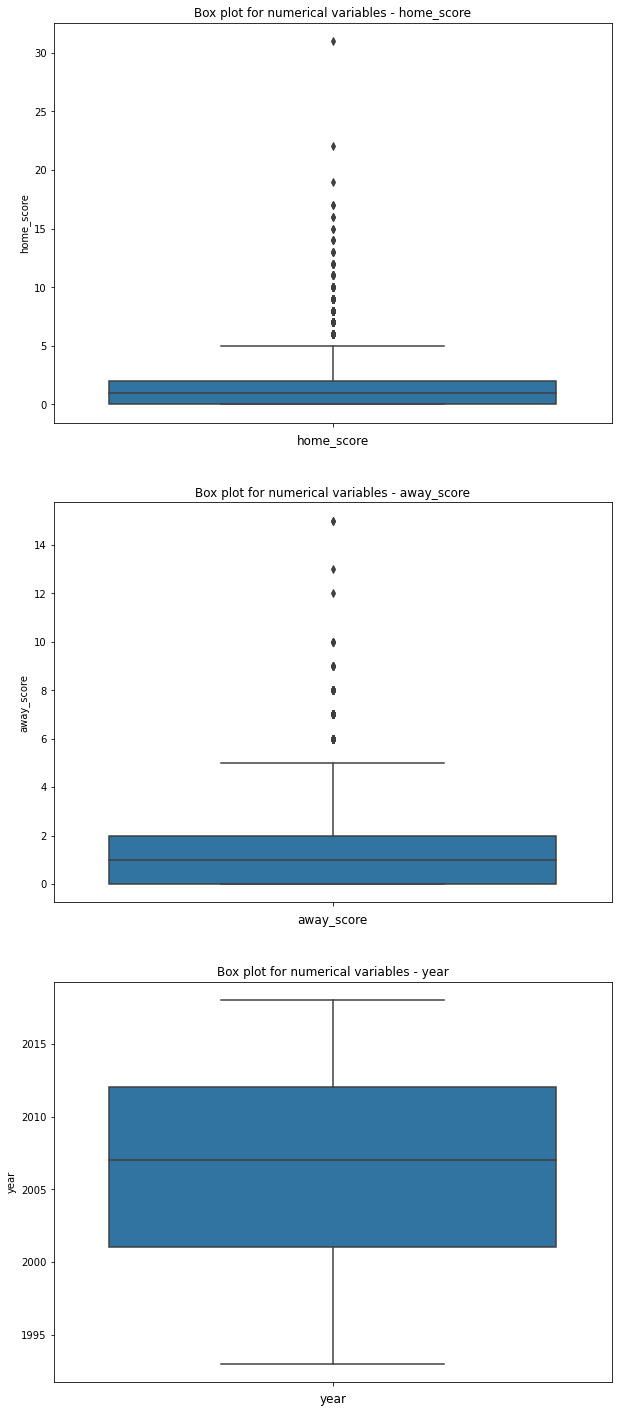

In [31]:
# Checking for Outliers
#
col_names= ['home_score','away_score', 'year']

fig, ax = plt.subplots(len(col_names), figsize=(10,25))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=football[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

**The dataset has some outliers. However, we do not drop them as they are true values**

In [32]:
# Checking for duplicated values
df.duplicated().sum()

16

In [33]:
df.drop_duplicates(inplace = True)

**There are 16 duplicate values. We drop all duplicates.**

In [34]:
#Looking at the final shape of our dataset
df.shape

(40892, 17)

## 8. Exploratory Analysis

### 8.1 Univariate Analysis

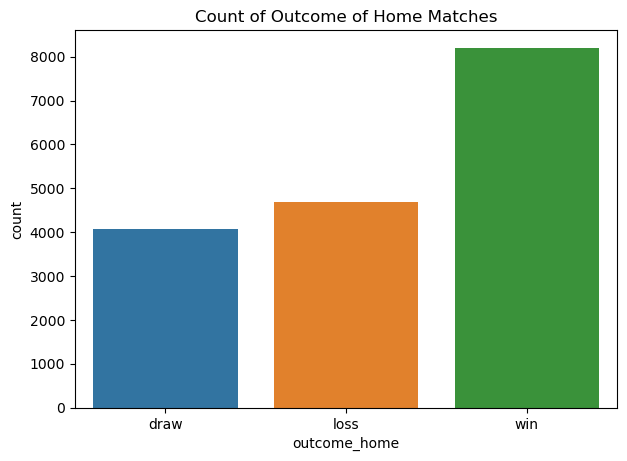

In [35]:
# Ploting home team outcome
plt.figure(dpi = 100, figsize = (7,5))
sns.countplot(football['outcome_home'])
plt.title("Count of Outcome of Home Matches")
plt.show()

**Home team mostly win their matches, lose then draw with the two coming in close**

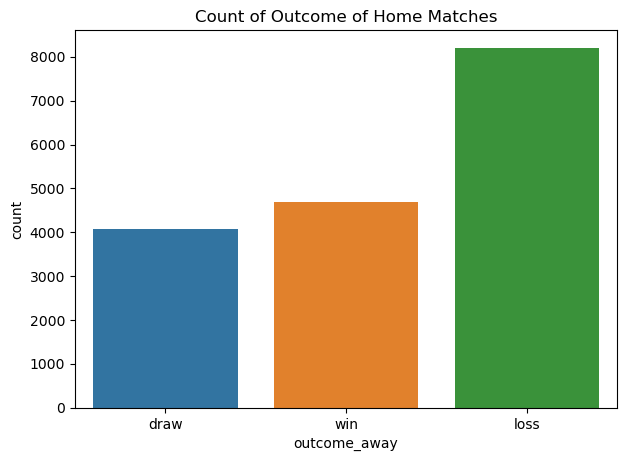

In [36]:
# Ploting away team outcome
plt.figure(dpi = 100, figsize = (7,5))
sns.countplot(football['outcome_away'])
plt.title("Count of Outcome of Home Matches")
plt.show()

**Away teams mostly lose their matches, other likelihoods win and draw are far behind.**

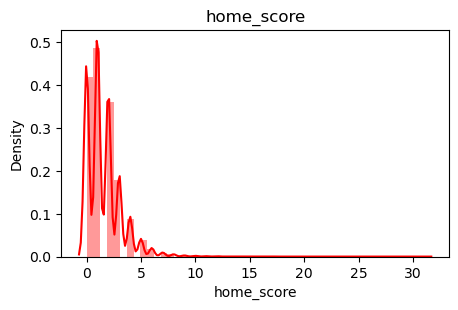

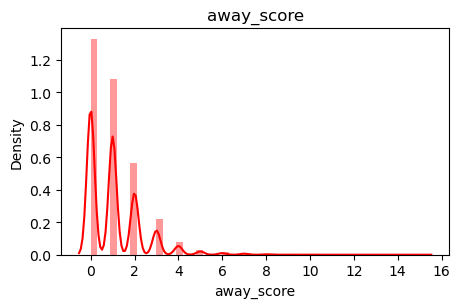

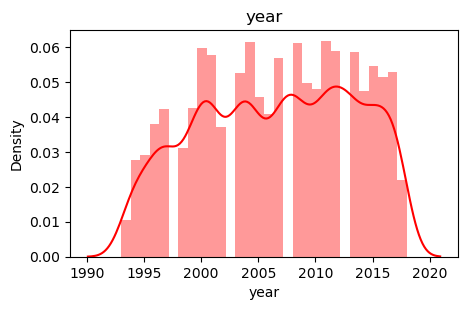

In [150]:
#Histogram for the numerical columns
for i in col_names:
  plt.figure(figsize = (5,3), dpi=100)
  sns.distplot(football[i], kde = True, color = 'red')
  plt.title(i, color = 'Black')
  plt.show()

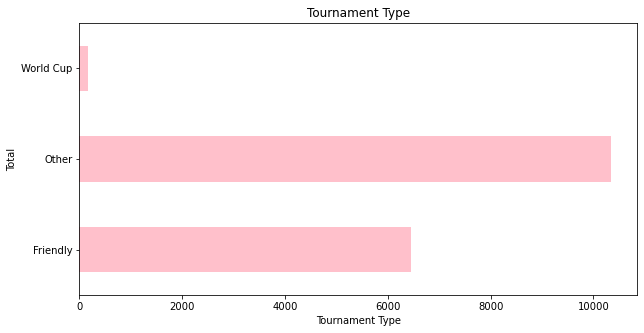

In [38]:
#Plotting the tournament types
plt.figure(figsize=(10,5))
football.groupby('tournament_type').size().plot(kind='barh', color='pink')
plt.title('Tournament Type')
plt.ylabel('Total')
plt.xlabel('Tournament Type')
plt.show()

**Other tournaments occur most followed by friendlies then the World Cup.**

In [39]:
#We now measure for central tendencies starting with the mean
football[col_names].mean()

home_score       1.602878
away_score       1.068290
year          2006.507696
dtype: float64

In [40]:
football[col_names].mode()

,home_score,away_score,year
0,1,0,2011


In [41]:
football[col_names].median()

home_score       1.0
away_score       1.0
year          2007.0
dtype: float64

In [42]:
football[col_names].quantile([0.25, 0.75])

,home_score,away_score,year
0.25,0.0,0.0,2001.0
0.75,2.0,2.0,2012.0


In [43]:
football[col_names].std()

home_score    1.614721
away_score    1.244543
year          6.799977
dtype: float64

In [44]:
football[col_names].var()

home_score     2.607324
away_score     1.548887
year          46.239694
dtype: float64

In [45]:
football[col_names].skew()

home_score    2.323152
away_score    1.926660
year         -0.128466
dtype: float64

In [46]:
football[col_names].kurt()

home_score    15.239377
away_score     7.158528
year          -1.089054
dtype: float64

## 8.2 Bivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

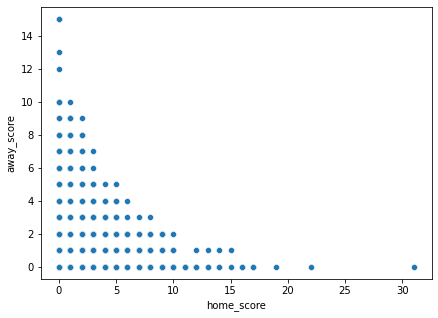

In [47]:
plt.figure(figsize = (7,5))
sns.scatterplot(data = football, x = 'home_score', y = 'away_score')
plt.show

**We can see the relationship between the home score and away score.**

In [48]:
#Correlation of the dataset
correlation = football.corr()

<AxesSubplot:>

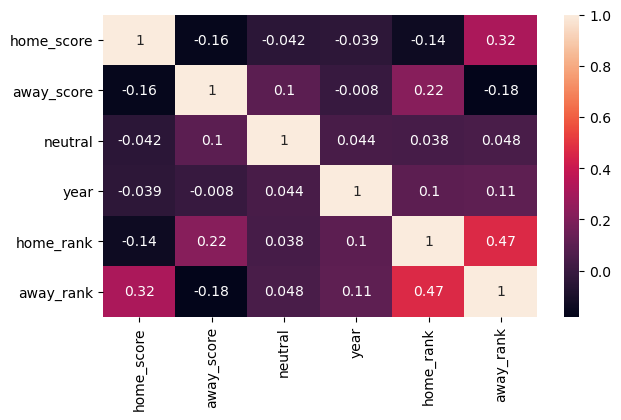

In [49]:
#Drawing a correlation heatmap
plt.figure(dpi = 100, figsize = (7,4))
sns.heatmap(correlation, annot = True)

**There is a correlation in the following levels**
- There is a strong correlation between home rank and away rank.
- There is a strong correlation between home score and away rank.
- There is a moderate correlation betweeen away score and home rank.
- There is a strong correlation between neutrality and the home rank as well as away rank.

**Multicollinearity**

<AxesSubplot:>

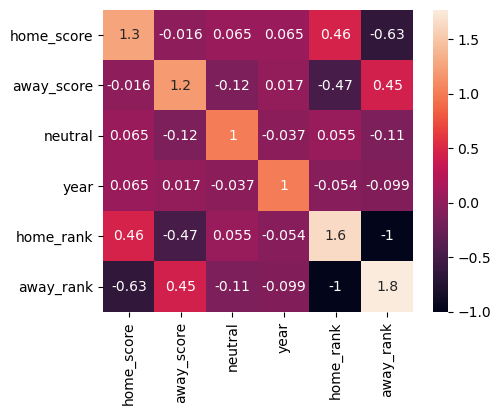

In [131]:
# checking for multicollinearity
# Using the variance Inflation Factor (VIF)

# This is calculated using linear algebra inverse function
plt.figure(dpi = 100, figsize = (5,4))
sns.heatmap(pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns), annot = True)

**There are no correlated independent variables using 5 as the threshhold**

### 8.3 Multivariate Analysis

#### 8.3.1 Data Preprocessing

In [51]:
#Importing the necessary libraries for our multivariate analysis
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [52]:
#First, we will label encode our data. We will drop the countries column as we won't use them for our findings
football2 = football.drop(columns = ['home_team', 'away_team', 'year'])

In [53]:
football2.head()

,home_score,away_score,neutral,outcome_home,outcome_away,tournament_type,home_rank,away_rank
17910,0,0,False,draw,draw,Other,19.0,67.0
17911,0,1,False,loss,win,Other,70.0,5.0
17912,0,0,False,draw,draw,Other,22.0,35.0
17913,1,5,False,loss,win,Other,94.0,8.0
17914,0,0,True,draw,draw,Other,58.0,25.0


In [54]:
#Applying label encoding to our dataset
df_football = football2.apply(LabelEncoder().fit_transform)
df_football.head()

,home_score,away_score,neutral,outcome_home,outcome_away,tournament_type,home_rank,away_rank
17910,0,0,0,0,0,1,18,66
17911,0,1,0,1,2,1,69,4
17912,0,0,0,0,0,1,21,34
17913,1,5,0,1,2,1,93,7
17914,0,0,1,0,0,1,57,24


**Using LDA to determine the best features to use for our model**

In [55]:
X = df_football.drop(['outcome_home'], axis = 1)
y = df_football['outcome_home']

In [56]:
#Create an instance of LDA and train the model
lda = LDA(solver='eigen',shrinkage='auto')
X_lda = lda.fit(X,y)
lda_feat = X_lda.transform(X)
#Display the coefficients of the reducted colums
X_lda.coef_

array([[ 2.24399621e-01,  7.31753959e-01,  7.73485282e-01,
        -5.29253290e-16,  1.90036410e+00,  1.96852059e-02,
         1.44123307e-02],
       [-4.10940461e-01,  2.71999352e+00,  7.92690970e-01,
         6.00743457e+02,  2.25074403e+00,  2.48560962e-02,
         1.06686223e-02],
       [ 1.53369269e+00, -1.91709091e-01,  6.24325098e-01,
         3.00371728e+02,  2.03846441e+00,  1.46481474e-02,
         1.97747310e-02]])

In [57]:
#Since the coefficients are in array, we need to create a dataframe so that we can extract the name of the columns
lda_df = pd.DataFrame(index=X.columns.values, data=X_lda.coef_[0].T)
lda_df.sort_values(0, ascending=False)

,0
tournament_type,1.900364e+00
neutral,7.734853e-01
away_score,7.317540e-01
home_score,2.243996e-01
home_rank,1.968521e-02
away_rank,1.441233e-02
outcome_away,-5.292533e-16


**The outcome of the away team will not be used as a feature in this case**

#### Training the Model

In [58]:
X = df_football.drop(['outcome_home', 'outcome_away'], axis = 1)
y = df_football['outcome_home']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [60]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [61]:
y_pred = model.predict(X_test)

In [62]:
print("Root mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root mean squared error:  0.0


In [63]:
model.score(X_test, y_test)

1.0

**We achieved a model score of 1 and that is a success as all the outcomes were correctly predicted.**

In [64]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions

,Actual,Predicted
29146,2,2
31945,0,0
35954,2,2
31091,0,0
20415,0,0
...,...,...
25063,2,2
27847,1,1
32958,2,2
30377,2,2


**Using cross validation**

In [68]:
# Using KFolds

# Splitting our dataset
# independet variables as X
# dependent variable as y

X = df_football.drop(['outcome_home', 'outcome_away'], axis = 1).values
y = df_football['outcome_home'].values

# specifying the number of folds

folds = KFold(n_splits = 5)


# We now create and assess 10 models based on the folds we created.

RMSES = [] # An array of RMSEs to keep track of the RSME of each model
count = 1   # starting point # helps to keep track of the model number in training

for train_index, test_index in folds.split(X):
    print('\nTraining model ' + str(count))
  
  # Setting up the train and test based on the split determined by KFold
  # With 10 folds we split our data into training and test sets
  
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
  # fitting a Logistic regression model
    LogReg = LogisticRegression()  
    LogReg.fit(X_train, y_train)
  
  # Assess the accuracy of the model
    y_pred = LogReg.predict(X_test)
  
  # Calculating the RMSES of each model
  # Appending each RMSE into the list earlier created
    rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    RMSES.append(rmse_value)
  
  
  # printing each model RMSE
    print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
    count = count + 1



Training model 1
Model 1 Root Mean Squared Error: 0.0

Training model 2
Model 2 Root Mean Squared Error: 0.0

Training model 3
Model 3 Root Mean Squared Error: 0.0

Training model 4
Model 4 Root Mean Squared Error: 0.0

Training model 5
Model 5 Root Mean Squared Error: 0.0


In [69]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions

,Actual,Predicted
0,2,2
1,0,0
2,2,2
3,2,2
4,1,1
...,...,...
3386,1,1
3387,1,1
3388,1,1
3389,2,2


## 9. Implementing the Solution

In [65]:
# Implementing the Solution
# 

## 10. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [66]:
# Reviewing the Solution 
#

## 9. Follow up questions

### a). Did we have the right data?

Yes, the data we had enabled us to create a strong model.

### b). Do we need other data to answer our question?

No more data is needed to answer our question.

### c). Did we have the right question?

Yes, the question we had allowed us to create the relevant model.